# Dataset Exploration Notebook

In [80]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os 
import sys

Let's set up things for Colab and non-Colab (just in case...)

In [7]:
if colab := 'google_colab' in sys.modules:
    from google.colab import drive
    drive.mount("/content/drive")
    # in case we'll do a shared drive, this will have to be changed.
    # For now it is basically a placeholder
    BASE_PATH = "drive/MyDrive/HLT/ProjectAthena/"
    sys.path.insert(0,BASE_PATH)

    # in case some packets have to be installed,
    # here is where we do it
else:
    BASE_PATH = ".."

In [8]:
df = pd.read_csv(os.path.join(BASE_PATH,'philosophy_data.csv'))

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."


## Dataset description

Let's start by the basics: how many texts in this dataset, from how many authors...

In [32]:
print(f'There are {len(df['title'].unique())} texts from {len(df['author'].unique())} authors, spanning {len(df['school'].unique())} schools of thought')

There are 59 texts from 36 authors, spanning 13 schools of thought


In [75]:
# Number of texts and authors per school of thought
df.groupby('school')[['title','author']].nunique()


,title,author
school,,
analytic,11,7
aristotle,1,1
capitalism,3,3
communism,3,2
continental,6,3
empiricism,6,3
feminism,3,3
german_idealism,7,3
nietzsche,5,1


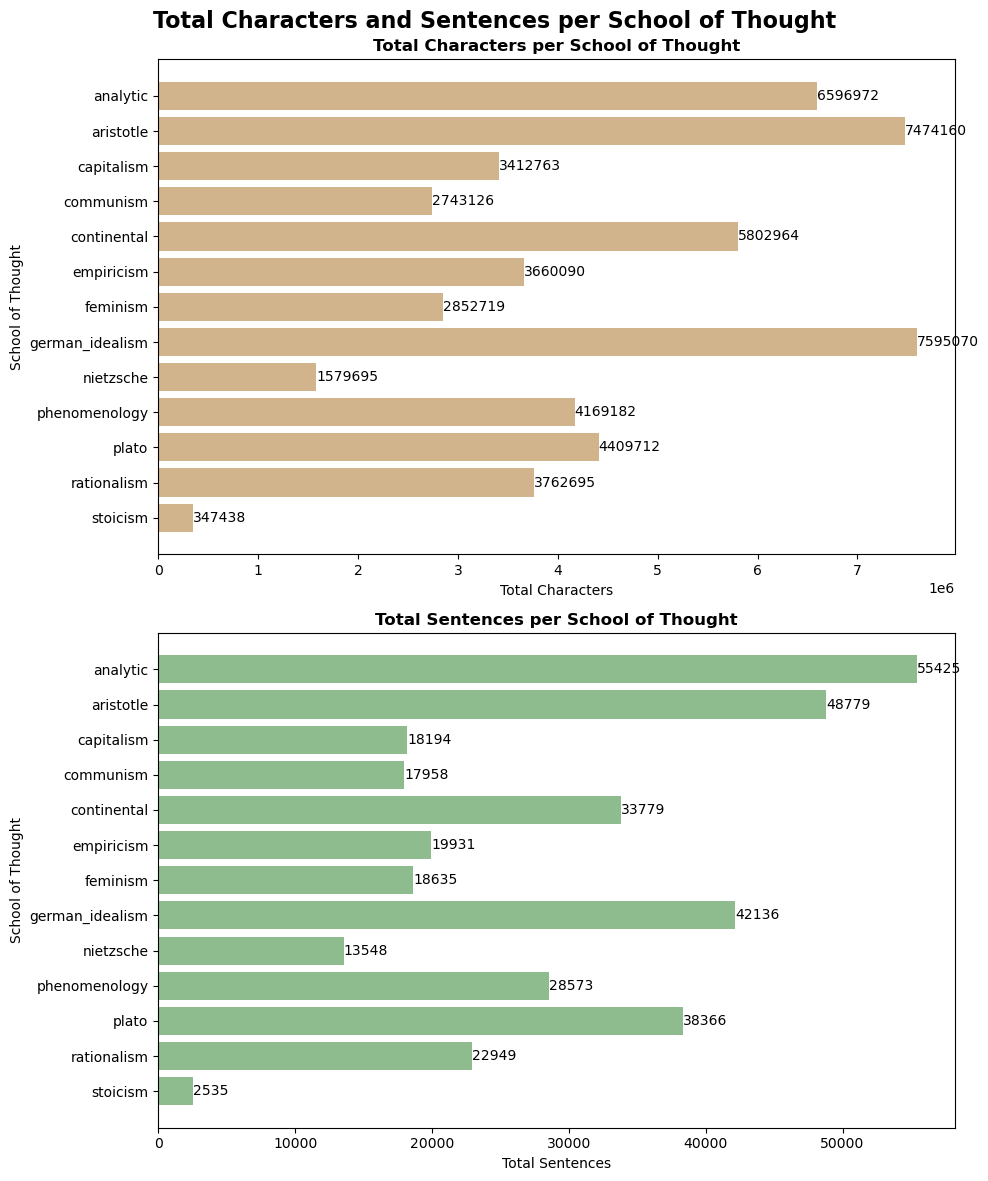

In [121]:
# Total amount of characters per school of thought
chars_per_school = df.groupby('school')['sentence_length'].sum().sort_index(ascending=False)
sentences_per_school = df['school'].value_counts().sort_index(ascending=False)

# Plotting the total amount of characters and sentences per school of thought
fig, ax = plt.subplots(2, figsize=(10, 12))
fig.suptitle('Total Characters and Sentences per School of Thought', fontweight='bold', fontsize=16)

# Plot for characters
barsC = ax[0].barh(chars_per_school.index, chars_per_school.values, color='tan')
ax[0].bar_label(barsC, fmt='%.0f')
ax[0].set_title('Total Characters per School of Thought',fontweight='bold')
ax[0].set_xlabel('Total Characters')
ax[0].set_ylabel('School of Thought')

# Plot for sentences
barsS = ax[1].barh(sentences_per_school.index, sentences_per_school.values, color='darkseagreen')
ax[1].bar_label(barsS, fmt='%.0f')
ax[1].set_title('Total Sentences per School of Thought',fontweight='bold')
ax[1].set_xlabel('Total Sentences')
ax[1].set_ylabel('School of Thought')

plt.tight_layout()
plt.show()

From these numbers we can already draw some considerations:
- The classes are very imbalanced (in terms of sentences, i.e. items to classify). The most populated classes are those relative to analytic philosophy, Aristotle, german idealism, plato
- The classes with the most sentences are not always those with the most number of characters. This leads to another interesting aspect of the analysis, which is *sentence length*

### Sentence length etc.